# COMP 4830 and 5500 Project 

## Instructions:
On this project, you can work alone or with one of your friends. Everyone needs to submit their project on ELEARN no matter it is done as a team or alone. In the report, write the names of all the students worked in this project. Put all files, source codes and your results in <span style="color:red">jupyter notebook file</span> and name it as LASTNAME_Project.ipynb  and submit it through eLearn. Any different form of submission will lose 10 points. Any kind of plagiarism is prohibited. Any late submission will lose 20 points.


Please enter your name: <strong> Kanchan Luitel</strong>  <br>
Your team members name: <strong> Yashesh Satyaprakash Gurrala </strong> <br>

## Project Description
The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

The dataset consists of 7 columns.

species: penguin species (Chinstrap, Adélie, or Gentoo)<br>
bill_length_mm: bill length (mm)<br>
bill_depth_mm: bill depth (mm)<br>
flipper_length_mm: flipper length (mm)<br>
body_mass_g: body mass (g)<br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)<br>
sex: penguin sex<br>


<table><tr>
<td> <img src="culmen.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="bodyparts.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

## Part 1 Preparing the Data (10 Points)

Clear the data by removing all the missing data features <br>
Choose only the Adelie and Gentoo species data <br>
Drop 'rowid', 'island', 'sex', 'year' <br>
Reset the index <br>
Create another data frame for pca which has only the 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g' <br> 
Draw a sublpot which shows all the 2D plots of the combinations of the various features (It will be a 2x3 and will show all the combinations of features such as bill_length_mm vs bill_depth_mm or bill_depth_mm vs body_mass_g <br>
Your Code:

In [34]:
#include all the modules here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# load in the dataset into a pandas dataframe and show the size of the file and show the first 5 rows of the data
originaldata = pd.read_csv(r'penguins.csv')
print(originaldata.shape)
originaldata.head()

# Drop Missing Values
df = originaldata.dropna()
print(df.shape)
df.head()

#choose only species : Adelie & Gentoo 
subsetdf = df[df["species"].isin(['Adelie', 'Gentoo'])]
print(subsetdf.shape)
subsetdf.head()

subsetdf = subsetdf.reset_index(drop=True)
subsetdf.head()

sex_island_df = subsetdf[['sex', 'island']]

subsetdf = subsetdf.drop(['rowid', 'island', 'sex', 'year'], axis=1)
print(f"Shape after dropping few columns: {subsetdf.shape}")
subsetdf.head()

# subsetdf = subsetdf.reset_index(drop=True)
# subsetdf.head()

pcadf = subsetdf[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
print(pcadf.shape)
pcadf.head()


(344, 9)
(333, 9)
(265, 9)
Shape after dropping few columns: (265, 5)
(265, 4)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


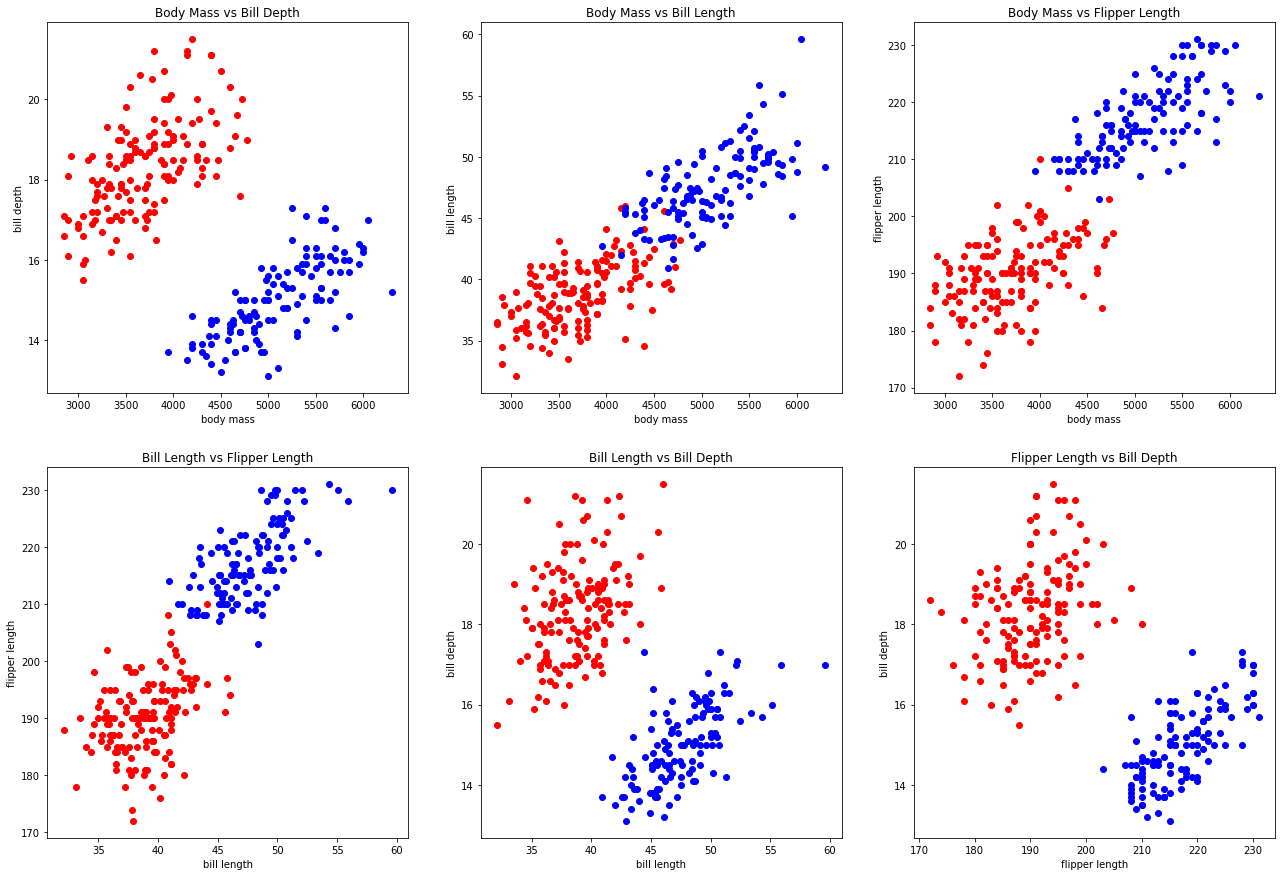

In [24]:
# plt.figure()
# plt.scatter(subsetdf[subsetdf.species=="Adelie"].body_mass_g, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
# plt.scatter(subsetdf[subsetdf.species=="Gentoo"].body_mass_g, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')


# subplot 2x3
# draw body_mass_g vs. bill_depth_mm
# draw bill_length_mm vs bill_depth_mm
# draw bill_length_mm vs body_mass_g.
# ....
fig,a =  plt.subplots(2,3, figsize=(22, 15))


a[0][0].scatter(subsetdf[subsetdf.species=="Adelie"].body_mass_g, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
a[0][0].scatter(subsetdf[subsetdf.species=="Gentoo"].body_mass_g, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')
a[0][0].set_xlabel("body mass")
a[0][0].set_ylabel("bill depth")
a[0][0].set_title("Body Mass vs Bill Depth")


a[0][1].scatter(subsetdf[subsetdf.species=="Adelie"].body_mass_g, subsetdf[subsetdf.species=="Adelie"].bill_length_mm,color='r')
a[0][1].scatter(subsetdf[subsetdf.species=="Gentoo"].body_mass_g, subsetdf[subsetdf.species=="Gentoo"].bill_length_mm,color='b')
a[0][1].set_xlabel("body mass")
a[0][1].set_ylabel("bill length")
a[0][1].set_title("Body Mass vs Bill Length")


a[0][2].scatter(subsetdf[subsetdf.species=="Adelie"].body_mass_g, subsetdf[subsetdf.species=="Adelie"].flipper_length_mm,color='r')
a[0][2].scatter(subsetdf[subsetdf.species=="Gentoo"].body_mass_g, subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm,color='b')
a[0][2].set_xlabel("body mass")
a[0][2].set_ylabel("flipper length")
a[0][2].set_title("Body Mass vs Flipper Length")

a[1][0].scatter(subsetdf[subsetdf.species=="Adelie"].bill_length_mm, subsetdf[subsetdf.species=="Adelie"].flipper_length_mm,color='r')
a[1][0].scatter(subsetdf[subsetdf.species=="Gentoo"].bill_length_mm, subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm,color='b')
a[1][0].set_xlabel("bill length")
a[1][0].set_ylabel("flipper length")
a[1][0].set_title("Bill Length vs Flipper Length")


a[1][1].scatter(subsetdf[subsetdf.species=="Adelie"].bill_length_mm, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
a[1][1].scatter(subsetdf[subsetdf.species=="Gentoo"].bill_length_mm, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')
a[1][1].set_xlabel("bill length")
a[1][1].set_ylabel("bill depth")
a[1][1].set_title("Bill Length vs Bill Depth")

a[1][2].scatter(subsetdf[subsetdf.species=="Adelie"].flipper_length_mm, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
a[1][2].scatter(subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')
a[1][2].set_xlabel("flipper length")
a[1][2].set_ylabel("bill depth")
a[1][2].set_title("Flipper Length vs Bill Depth")

plt.show()


#### Discuss which of the two features are good to be used to classify these two species? 


Your Answer: 

## Part 2 PCA
Apply PCA to the data <br>
Find and figure out how many principal components are good to choose for classification <br>
Draw a 2-D and 3-D graphs using the best principal components (choose best 2 principal components for 2D and choose best 3 for the 3D plots)  <br>
Your code:

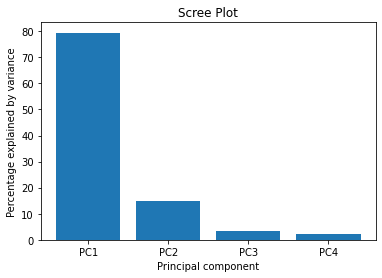

Percentage value of Principal components: [79.43 14.95  3.25  2.37]



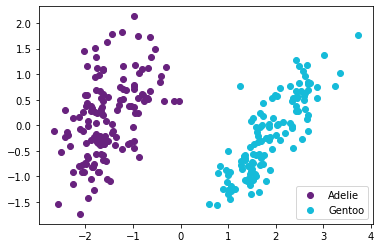

In [42]:
data = pcadf

scaled_data = preprocessing.scale(data)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_ * 100,  decimals = 2)

labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

# scree plot 
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage explained by variance')
plt.xlabel('Principal component')
plt.title('Scree Plot')
plt.show()

print('Percentage value of Principal components: ' +  str(per_var))
print()

pca_df = pd.DataFrame(pca_data, columns=labels)

import random as rd 

color_list = [ '#68227E', '#15BBD9', '#42C268', '#503F21', '#5EABB1', '#6E4F32']

species_unique_list = subsetdf.species.unique().tolist()

species_list = subsetdf.species.tolist()


# scatter plot each row of (PC1, PC2)
for sample in pca_df.index:   
    index = species_unique_list.index(species_list[sample])
    s = plt.scatter(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample], 
                           color= color_list[index])
    
for l in set(species_unique_list):
    plt.scatter([],[], color=color_list[species_unique_list.index(l)], label=l)
plt.legend()

265


<IPython.core.display.Javascript object>


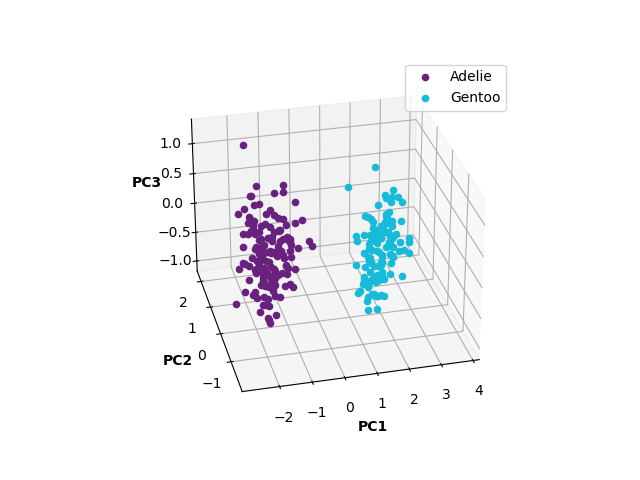

In [59]:
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

data = (pca_df.PC1.tolist(), pca_df.PC2.tolist(), pca_df.PC3.tolist())
colors = ("red", "green")
groups = ("bird1", "bird2") 
print(len(data[0]))

# Create plot
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
# ax = fig.gca(projection='3d')

# for data, color, group in zip(data, colors, groups):
#     x, y, z = data
#     ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

# plt.title('Matplot 3d scatter plot')
# plt.legend(loc=2)
# plt.show()


# fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Create Plot

for sample in pca_df.index:   
    index = species_unique_list.index(species_list[sample])
    s = ax.scatter3D(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample], pca_df.PC3.loc[sample],
                           color= color_list[index])
    
for l in set(species_unique_list):
    ax.scatter3D([],[], color=color_list[species_unique_list.index(l)], label=l)
plt.legend()

# Add axis

ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')

plt.show()

#### Discuss your results? In terms of classification, compare the results from pca vs part 1 subplots? Does PCA helps us to classify better or not? Explain it. 

Your Answer:

## Part 3 Kmeans
Apply Kmeans to the PCA Data and plot the results <br>
Your code:

#### Discuss your results? Are you able to seperate all the species correctly with Kmeans? 

Your Answer:

## Part 4 Neural Network
Use neural network based classifier to find the members of each class using the best principal components from part 2. <br>
Your Code:

## Part 5 Graduate Student (BONUS for Undergraduate Students)

Choose all the samples for species. This time use, sex data for classification. And apply the same requirements listed in part 2,3,4. Show and explain which features are the best for classification.<br>
Your Code and Discussions: